# Exercise 2: Getting to know...
## Geographic Information Systems 1 Lab
### GEOG 3150

#### To begin each assignment, you will first make a copy of the _colab notebook_ for that specific exercise by going to **_File > Save a copy in Drive_**. Next, you will want to be sure you are connected and all of the sample scripts have been run. To do this you will select _Runtime > Run all_ from the menu bar. This may take a moment to complete so be patient until the last code cell has been executed. To answer questions or edit the scripts you can double click in the text/code blocks or create a new text/code block of your own. When you have completed the exercise you can share your answers with me by using the **Share** button at the top of the page, adjusting the restrictions to "change to anyone with the link", then copying the link and emailing it to me.

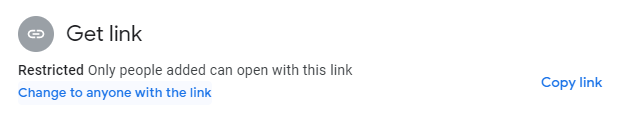

# Information

#### Before beginning the exercise be sure to thoroughly read the the exercise page on [GitHub](https://chrismgentry.github.io/GIS1-Exercise-2). This will provide additional information not covered in this notebook. It would be beneficial to have both windows open so you can refer back to the exercise at any time while working on this notebook. Throughout this notebook there will be various code cells and text cells you may need to edit. Simply double-click on the cell to open it for editing. If you have any questions about using the **Google Colaboratory** for these exercises please let me know

Atypical information regarding the _ggsn package_:<br>
"Due to a dependency issue, the following script had to be used to ensure that the _ggsn_ package would load correctly for this exercise."

Load the `tidyverse` and `scales` Packages.

In [1]:
library("tidyverse")
library("scales")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Step One: The Data
The following steps will take you through the loading of packages, linking to the data, obtaining state information, and viewing datasets.

### Installing and loading additional packages

In [2]:
#Install time ~12min
install.packages("maps")
install.packages("ggspatial")
library("maps")
library("ggspatial")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘classInt’, ‘s2’, ‘units’, ‘jpeg’, ‘png’, ‘wk’, ‘sf’, ‘rosm’, ‘abind’



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




### Connecting to and viewing the data

In [3]:
evs <- read.csv('https://raw.githubusercontent.com/chrismgentry/GIS1-Exercise-2/main/Data/ev_stations.csv')
head(evs)

,state,abbreviation,evs_count
,<chr>,<chr>,<int>
1,alabama,AL,426
2,arizona,AZ,1840
3,arkansas,AR,353
4,california,CA,32601
5,colorado,CO,3042
6,connecticut,CT,1165


### Obtaining state information

In [4]:
us <- map_data('state')

### Examining the structure of the **US** data

In [5]:
str(us)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


### Quick plot of **US** data

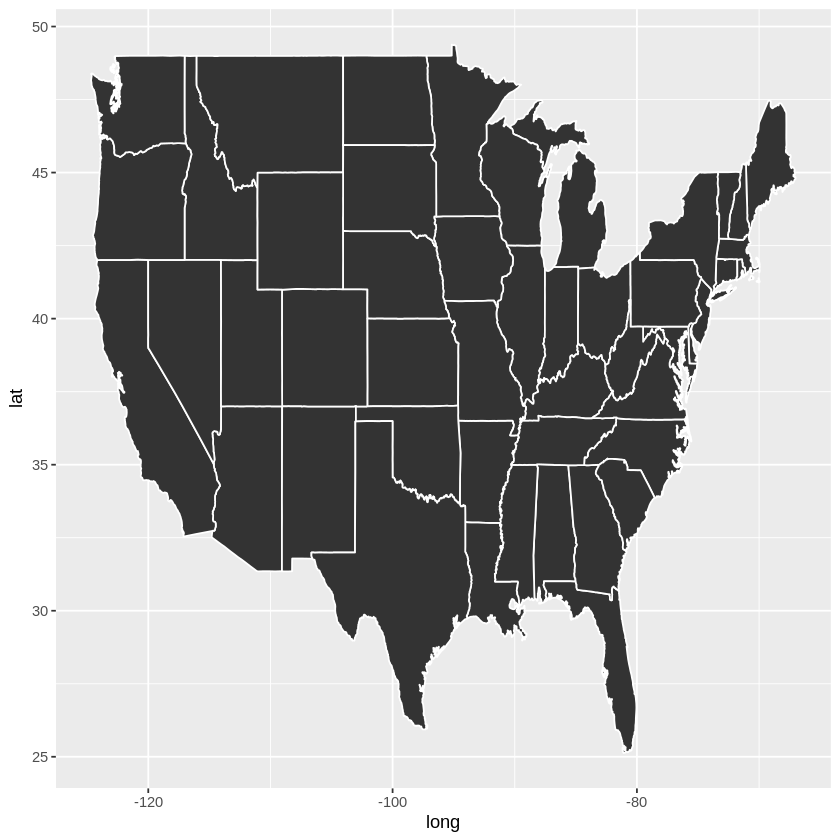

In [6]:
ggplot(us) + geom_polygon(aes(x=long, y=lat, group=group), color="white")

## **Question No. 1**
You used ```ggplot(us) + geom_polygon(aes(x=long, y=lat, group=group), color = "white")``` to create the visualization in this step. What script would you use to make the same map but with black borders and blue states? Add a code cell below this one, type the script, and run it to view the output.<br>
<small>Hint: color = “…..”, fill = “…..”</small>

### **ANSWER**:

# Step Two: The Analysis

In this step you will combined the electric vehicle charging station data with the states data.

### Merging **us** and **evs** data

In [7]:
states <- merge(x = us, y = evs, by.x = "region", by.y = "state", all = TRUE)

## **Question No. 2**
Using ```summary(states)``` in a new code cell, what are the largest and smallest number of electric vehicle charging stations?

### **ANSWER**:

# Step Three: The Visualization

In order to ensure the data has all the spatial information necessary to provide precise coordinates, north arrow positioning, and accurate scalebar, you will first convert the simple polygons to a _simple feature_ object.

In [10]:
states <- sf::st_as_sf(maps::map("state", plot = FALSE, fill = TRUE))
states <- merge(x=states, y=evs, by.x="ID", by.y="state", all=TRUE)

Scale on map varies by more than 10%, scale bar may be inaccurate



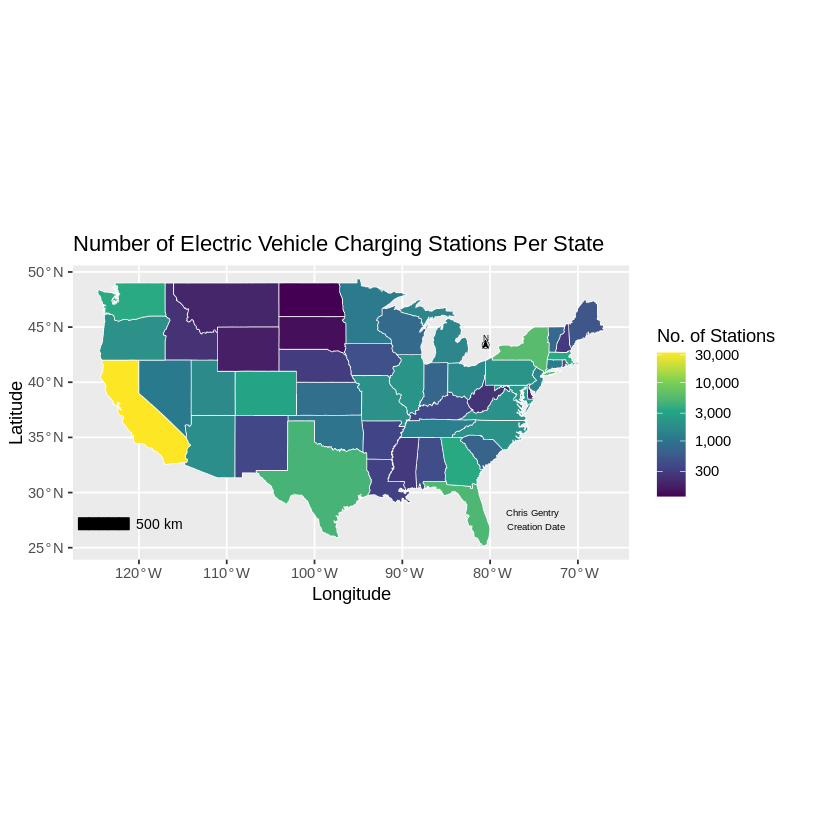

In [105]:
ggplot() + geom_sf(data = states, aes(fill = evs_count), color="white") +
           annotation_scale(location = "bl", width_hint = 0.1, bar_cols = "black",
                 pad_x = unit(0.05, "in"), pad_y = unit(0.25, "in"),
                 line_col = "black", text_col = "black") +
           annotation_north_arrow(location = "br", which_north = "grid",
                         pad_x = unit(1.15, "in"), pad_y = unit(1.75, "in"),
                         height = unit(0.25, "cm"), width = unit(0.25, "cm"),
                         style = north_arrow_fancy_orienteering(
                           fill = c("black", "black"),
                           line_col = "black", line_width = 0.5,
                           text_size = 5, text_col = "black")) +
           scale_fill_viridis_c(option = "D", trans = "log10", labels = scales::label_comma()) +
           annotate("text", x = -75, y = 27.5, label = "Chris Gentry \n Creation Date", size = 2) +
           labs(x="Longitude",y="Latitude", title="Number of Electric Vehicle Charging Stations Per State", fill = "No. of Stations")

Of course, this is just the most basic map design without a number of carotgraphic skills you learned in the GIS 1 course. In order to add a little more quality to the map you should add the neighboring countries, color the ocean and lakes, and remove the unnecessary gridlines. To do this you will need to add a few more lines of code.

In [99]:
countries <- map_data("world")
lakes <- map_data("lakes")

Scale on map varies by more than 10%, scale bar may be inaccurate



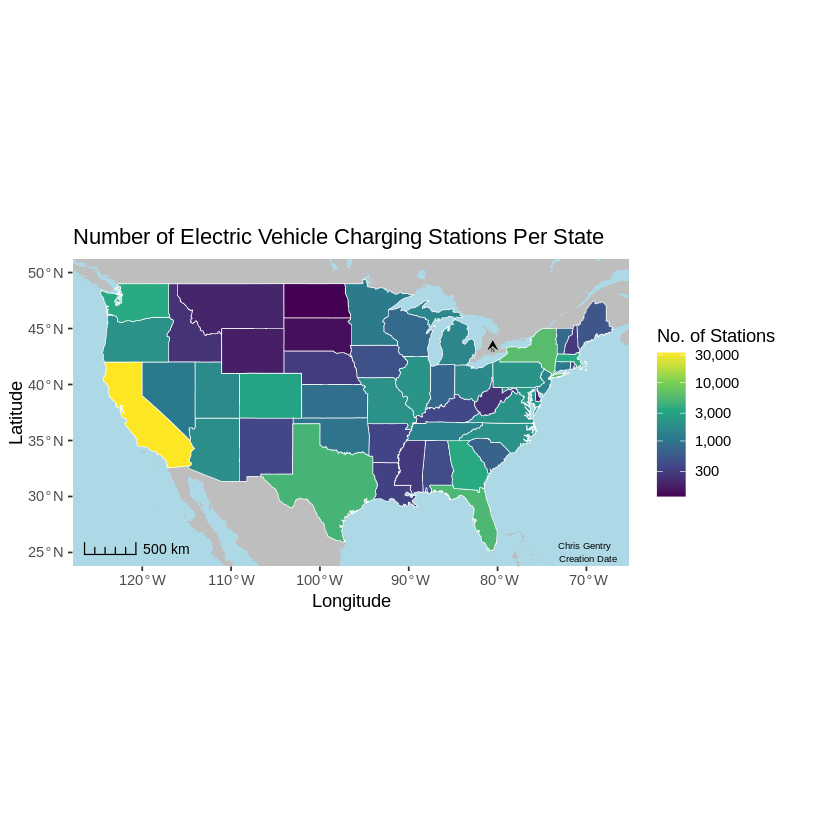

In [106]:
ggplot() + geom_polygon(data = countries, aes(x = long, y = lat, group = group), fill = "gray") +
           geom_polygon(data = lakes, aes(x = long, y = lat, group = group), fill = "lightblue") +
           geom_sf(data = states, aes(fill = evs_count), color="white") +
           annotation_scale(location = "bl", width_hint = 0.1, bar_cols = "black",
                 pad_x = unit(0.1, "in"), pad_y = unit(0.1, "in"),
                 line_col = "black", text_col = "black", style = "ticks") +
           annotation_north_arrow(location = "br", which_north = "grid",
                         pad_x = unit(1.1, "in"), pad_y = unit(1.8, "in"),
                         height = unit(0.2, "cm"), width = unit(0.2, "cm"),
                         style = north_arrow_orienteering(
                           fill = c("black", "black"),
                           line_col = "black", line_width = 0.5,
                           text_size = 1, text_col = "black")) +
           scale_fill_viridis_c(option = "D", trans = "log10", labels = scales::label_comma()) +
           annotate("text", x = -70, y = 25, label = "Chris Gentry \n Creation Date", size = 2) +
           theme(panel.background = element_rect(fill = "lightblue"),
                 panel.grid.major = element_blank()) +
           coord_sf(xlim = c(-125,-68), ylim = c(25,50)) +
           labs(x="Longitude",y="Latitude", title="Number of Electric Vehicle Charging Stations Per State", fill = "No. of Stations")

## **Question No. 3**
How does the _pad_x =_ argument in the `annotation_scale` function differ from the _x =_ argument in `annotate`? How would changing the values alter the appearance?

### **ANSWER**:

# Step Four: Your Turn

In [107]:
tn <- map_data('county', region = "tennessee")

Complete the code cell below by (refer to the example above):
- removing the # <small>(used to convert a line of script to a comment line)</small>
- inserting the proper function

In [108]:
#tornadoes <- function('https://raw.githubusercontent.com/chrismgentry/GIS1-Exercise-2/main/Data/tn_tornadoes.csv')

Complete the code cell below by (refer to the example above):
- removing the #
- creating an object name
- identifying the appropriate objects for the by.x and by.y arguments
 - identifying the correct merge variable (column) from each dataset

In [ ]:
#object <- sf::st_as_sf(maps::map("state being examined above", plot = FALSE, fill = TRUE))
#object <- merge(x="previous object", y=tornadoes, by.x = variable from x dataset, by.y = variable from y dataset, all = TRUE)

Complete the code cell below by (refer to the example above):
- removing all the #s
- identify the appropriate object (created in the previous step) for the data and variable (tornado count) for the `aes(fill = )`
- provide and appropriate title for the map, `labs(title = )`, and legend information, `labs(fill = )`
- identifying the appropriate values below for `annotation_scale`
  - location
  - width_hint
  - bar_cols
  - pad_x
  - pad_y
  - line_col
  - text_col
- identifying the appropriate values below for the `annotation_north_arrow`
  - location
  - which_north
  - pad_x, pad_y
  - height, width
  - style, fill
  - line_col, line_width
  - text_size, text_col
- provide a location and text for your name and date in `annotate`

In [ ]:
# ggplot() + geom_sf(data = object, aes(fill = column from dataset), color="white") +
#            labs(x="Longitude",y="Latitude", title="Give the Map a Title", fill = "Legend Information") +
#            annotation_scale(location = "?", width_hint = 0.1, bar_cols = "color",
#            pad_x = unit(?,"in"), pad_y = unit(?,"in"), line_col = "black", text_col = "black") +
#            annotation_north_arrow(location = "?", which_north = ?,
#                  pad_x = unit(?,"in"), pad_y = unit(?,"in"), height = unit(0.25, "cm"), width = unit(0.25, "cm"),
#                          style = north_arrow_fancy_orienteering(
#                           fill = c("black", "black"),
#                           line_col = "black", line_width = 0.5,
#                           text_size = 5, text_col = "black"))) +
#            coord_fixed(xlim = c(-90,-82), ylim = c(35, 37)) +
#            scale_fill_viridis_c(option = "D") +
#            annotate("text", x = location, y = location, label = "Your Name \n Date", size = numeric value)

## **Question No. 4**
Which county had the highest number of reported tornadoes?
Type subset(tornadoes, tornado_count == max(tornado_count)) into a new code cell or use Google to search for a county map of Tennessee to determine county locations on your map.

### **ANSWER**:

# The Write-Up
The Montgomery County Emergency Management Agency has asked you to provide a map detailing the number of reported tornadoes in each Tennessee county over the past several decades. Based on the map you create above, complete a lab write-up that addresses the following questions:

- Provide the names of the five (5) counties that recorded the most tornadoes during that time frame
- Describe which regions of Tennessee had the fewest reported tornadoes
- Inform MCEMA which metropolitan regions could be most impacted by future severe weather events

### **Type write-up here**: